In [47]:
import sim                         # librería para conectar con CoppeliaSim
import time                        # libreria para manejo de tiempo
import numpy as np                 # libreria de calculos matematicos 
from timer import Timer            # libreria de cronometro 
import sympy as sp                 # libreria de ecuaciones simbolicas
import cv2                         # libreria para vision artificial de OpenCV
import matplotlib.pyplot as plt    # libreria para graficar en Python
from pyzbar.pyzbar import decode   # libreria para leer codigo de barras  

In [48]:
def connect(port):
# Establece la conexión a VREP
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID
clientID = connect(19999) 

conectado a 19999


In [53]:
retCode,SensorHandle=sim.simxGetObjectHandle(clientID,'Vision_sensor',sim.simx_opmode_blocking)
r,resolucion,imagen = sim.simxGetVisionSensorImage(clientID, SensorHandle,0,sim.simx_opmode_oneshot_wait )
print(resolucion)

[256, 256]


In [54]:
img = np.array(imagen, dtype=np.uint8)
img.resize([resolucion[1],resolucion[0],3])
img_BGR = cv2.cvtColor (img, cv2.COLOR_RGB2BGR)
img_GRAY = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
r, thresh = cv2.threshold(img_GRAY, 200, 255, cv2.THRESH_BINARY)

In [56]:
if (thresh1==thresh).all(): 
    print("Si tiene codigo de barra")
else:
    print("No tiene codigo de barra")

Si tiene codigo de barra


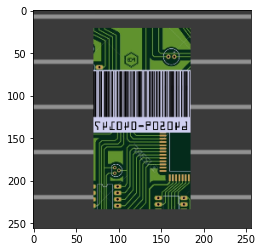

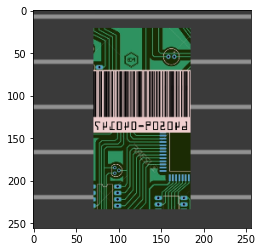

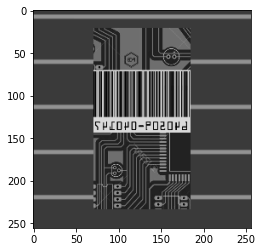

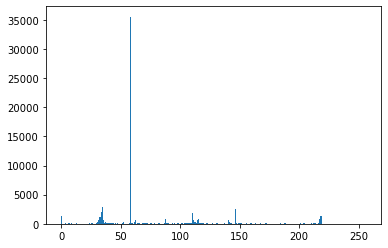

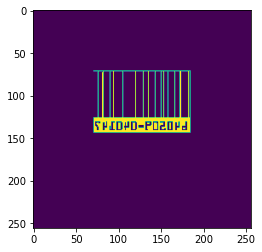

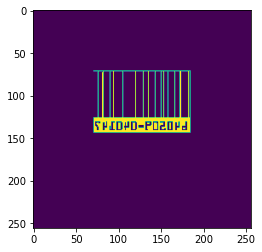

In [55]:
plt.imshow(img)
plt.show()
plt.imshow(img_BGR)
plt.show()
plt.imshow(img_GRAY, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.hist(img_GRAY.ravel(),256,[0,256])
plt.show()
plt.imshow(thresh)
plt.show()
#thresh1 = thresh
plt.imshow(thresh1)
plt.show()

In [17]:
img1 = cv2.imread('barcode.png')
for barcode in decode(img1):
    print (barcode.data)
    myData = barcode.data.decode('utf-8')
    print (myData)

b'640509-040147'
640509-040147
